In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('./data/dataset_summary.csv')

In [2]:
data

,data_split,sub_directory,image_count
0,val,healthy_guava,185
1,val,fruit_fly,262
2,val,Anthracnose,308
3,test,healthy_guava,94
4,test,fruit_fly,132
5,test,Anthracnose,156
6,train,healthy_guava,649
7,train,fruit_fly,918
8,train,Anthracnose,1080


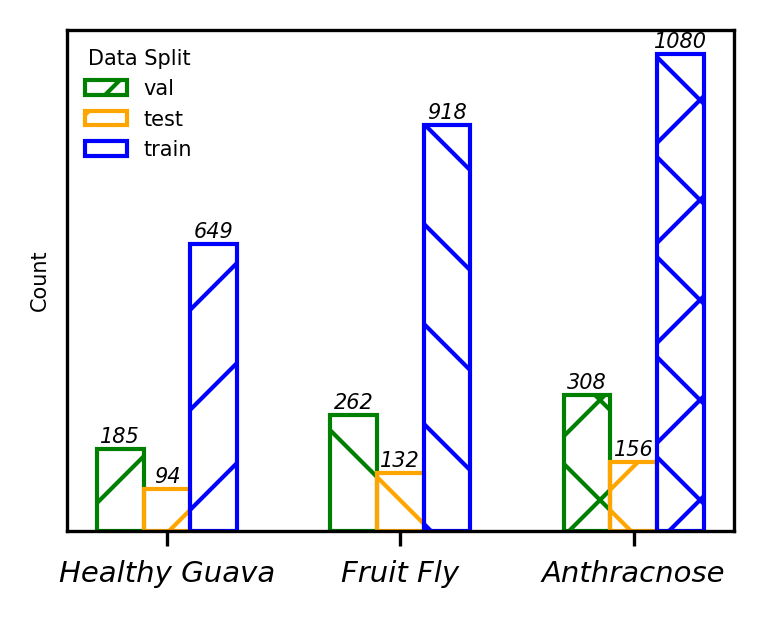

In [10]:
import matplotlib.pyplot as plt
import os

output_dir = 'outputs'
os.makedirs(output_dir, exist_ok=True)

class_labels = {
    'healthy_guava': 'Healthy Guava',
    'fruit_fly': 'Fruit Fly',
    'Anthracnose': 'Anthracnose'
}

fig, ax = plt.subplots(figsize=(2.5, 2.0), dpi=300)

splits = data['data_split'].unique()
classes = data['sub_directory'].unique()

colors = {'train': 'blue', 'val': 'green', 'test': 'orange'}
hatches = {'healthy_guava': '/', 'fruit_fly': '\\', 'Anthracnose': 'x'}

bar_width = 0.2
positions = np.arange(len(classes))

for i, split in enumerate(splits):
    split_data = data[data['data_split'] == split]
    counts = split_data['image_count']
    labels = split_data['sub_directory']
    x_positions = positions + i * bar_width
    bars = ax.bar(x_positions, counts, width=bar_width, edgecolor=colors[split],
                  facecolor='none', label=f"{split}")

    for bar, class_label, count in zip(bars, labels, counts):
        bar.set_hatch(hatches[class_label])
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5,
                str(count), ha='center', va='bottom', fontsize=5, fontstyle='italic')

ax.set_xticks(positions + bar_width)
ax.set_xticklabels([class_labels[cls] for cls in classes], ha='center', fontsize=7, fontstyle='italic')
ax.legend(title='Data Split', fontsize=5, title_fontsize=5, loc='upper left', frameon=False)
ax.set_ylabel('Count',fontsize=5)
ax.tick_params(axis='y', which='both', left=False, labelleft=False)

plt.tight_layout(pad=0.5)
plt.savefig(os.path.join(output_dir, 'plot.png'), dpi=300)
plt.savefig(os.path.join(output_dir, 'plot.svg'))